In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as math
import seaborn as sns
from jupyterthemes import jtplot
jtplot.style()
jtplot.style(theme='onedork')
import random
from datetime import datetime
%matplotlib inline
#%pylab inline

# Implementacja LFG i generowanie rozkładu normlanego na ich podstawie

Text(0.5,0,'Średnia z próbek')

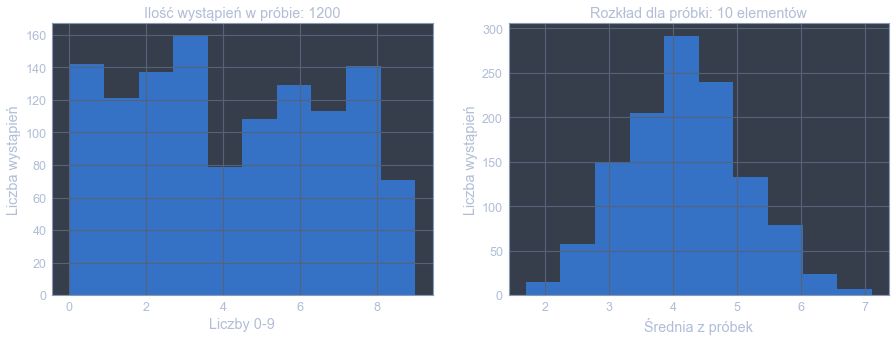

In [4]:
# generowanie liczb losowych na podstawie LFG

LFGpop = 1200 # wielkość populacji

# losowy wiersz początkowy na podstawie milisekund
millis = int(round(time.time() * 1000))
seed = list(map(int, str(millis)))
seed7 = seed[-7:]

# algorytm LFG
j = 3
k = 7
s = seed7

abc =[]

for n in range(int(LFGpop)):

   for i in range(len(s)):
       if i is 0:
           out = (s[j-1] + s[k-1]) % 10 # the pseudorandom output

       elif 0 < i < 6:
           s[i] = s[i+1] # shift the array

       else:
           s[i] = out
           #print(s[i])
           abc.append(s[i]) #

# wybieranie próbek do rozkładu normlanego z listy LFG

LFGsample = 10 #wielkość próbki
cba = []
x2=0

while x2 < len(abc):
   avg = (sum(random.sample(abc,LFGsample)))/LFGsample
   cba.append( avg )
   x2+=1

# wykresy
plt.rcParams['axes.grid'] = True
f = plt.figure(figsize=(15,5))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)


ax.hist(abc)
ax.title.set_text("Ilość wystąpień w próbie: " + str(LFGpop))
ax.set_ylabel("Liczba wystąpień")
ax.set_xlabel("Liczby 0-9")

ax2.hist(cba)
ax2.title.set_text("Rozkład dla próbki: " + str(LFGsample) + " elementów")
ax2.set_ylabel("Liczba wystąpień")
ax2.set_xlabel("Średnia z próbek")

# Generowanie liczb losowych Pythona i generowanie rozkładu normalnego na ich podstawie

Text(0.5,0,'Średnia z próbek')

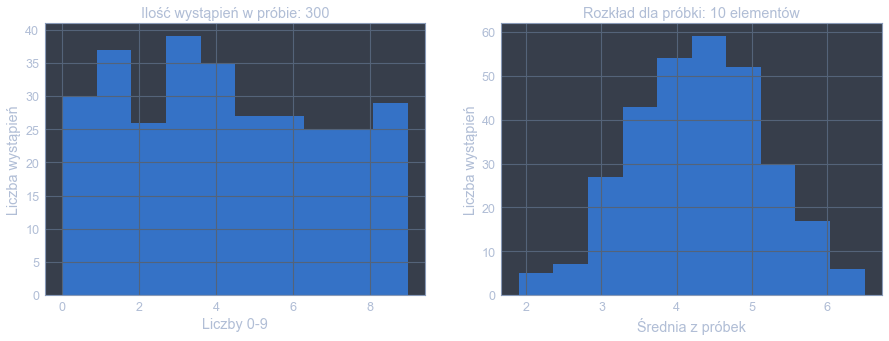

In [21]:
# generowanie liczb losowych Pythona
PythPop= 300
mylist = []

for i in range(0,int(PythPop)):
    pyth = random.randint(0,9)
    mylist.append(pyth)

# wybieranie próbek do rozkładu normlanego z listy Pythona

PythSample = 10
cba2 = []
x3=0

while x3 < len(mylist):
   avg = (sum(random.sample(mylist,PythSample )))/PythSample 
   cba2.append( avg )
   x3+=1

# wykresy

f = plt.figure(figsize=(15,5))
ax3 = f.add_subplot(121)
ax4 = f.add_subplot(122)

ax3.hist(mylist)
ax3.title.set_text("Ilość wystąpień w próbie: " + str(PythPop))
ax3.set_ylabel("Liczba wystąpień")
ax3.set_xlabel("Liczby 0-9")

ax4.hist(cba2)
ax4.title.set_text("Rozkład dla próbki: " + str(PythSample) + " elementów")
ax4.set_ylabel("Liczba wystąpień")
ax4.set_xlabel("Średnia z próbek")

# Testowanie rozkładów

T-Student dla niezależnych grup 

In [6]:
from scipy.stats import ttest_ind
from scipy import stats
from scipy.stats import t

In [7]:
# źródło https://machinelearningmastery.com/how-to-code-the-students-t-test-from-scratch-in-python/

def independent_ttest(cba, cba2, alpha):
    # calculate means
    mean1, mean2 = mean(cba), mean(cba2)
    # calculate standard errors
    se1, se2 = stats.sem(cba), stats.sem(cba2)
    # standard error on the difference between the samples
    sed = sqrt(se1**2.0 + se2**2.0)
    # calculate the t statistic
    t_stat = (mean1 - mean2) / sed
    # degrees of freedom
    df = len(cba) + len(cba2) - 2
    # calculate the critical value
    cv = t.ppf(1.0 - alpha, df)
    # calculate the p-value
    p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
    # return everything
    return t_stat, df, cv, p

alpha = 0.05
t_stat, df, cv, p = independent_ttest(cba, cba2, alpha)
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, df, cv, p))
# interpret via critical value
if abs(t_stat) <= cv:
    print('Accept null hypothesis that the means are equal. T_stat <= cv')
else:
    print('Reject the null hypothesis that the means are equal. T_stat > cv')
# interpret via p-value
if p > alpha:
    print('Accept null hypothesis that the means are equal. p > alpha')
else:
    print('Reject the null hypothesis that the means are equal. p <= alpha')

t=-0.349, df=1498, cv=1.646, p=0.727
Accept null hypothesis that the means are equal. T_stat <= cv
Accept null hypothesis that the means are equal. p > alpha


# Chisquare

In [15]:
from collections import Counter

In [38]:
abc_np = np.array(abc) # ciąg liczb z LFG
mylist_np = np.array(mylist) # ciąg liczb z pythona

In [39]:
mylist_np

array([6, 1, 9, 9, 4, 9, 0, 9, 0, 8, 4, 4, 3, 9, 2, 5, 3, 0, 3, 2, 5, 5,
       3, 1, 3, 7, 0, 7, 9, 7, 5, 6, 9, 6, 8, 4, 0, 3, 3, 1, 1, 5, 2, 1,
       0, 0, 3, 2, 7, 7, 6, 4, 4, 3, 8, 9, 1, 0, 3, 4, 0, 9, 0, 2, 1, 0,
       9, 5, 3, 8, 6, 5, 1, 5, 1, 8, 7, 8, 4, 1, 2, 3, 3, 8, 4, 6, 4, 0,
       6, 0, 5, 1, 5, 1, 3, 1, 9, 8, 6, 3, 0, 5, 0, 0, 0, 1, 5, 1, 0, 4,
       0, 4, 4, 8, 2, 3, 9, 6, 1, 2, 4, 7, 3, 3, 9, 8, 3, 2, 3, 4, 2, 8,
       2, 7, 2, 9, 6, 8, 9, 3, 3, 8, 1, 4, 4, 1, 1, 7, 8, 9, 7, 4, 9, 2,
       8, 1, 1, 2, 0, 7, 1, 6, 0, 0, 3, 9, 3, 9, 1, 4, 7, 6, 5, 5, 7, 4,
       0, 3, 2, 0, 7, 3, 4, 3, 8, 3, 4, 8, 0, 8, 3, 3, 0, 1, 5, 3, 6, 7,
       1, 1, 5, 8, 2, 9, 5, 1, 4, 6, 0, 5, 4, 7, 6, 2, 6, 4, 2, 2, 7, 6,
       8, 3, 3, 9, 4, 5, 6, 2, 4, 1, 7, 6, 5, 1, 4, 2, 8, 1, 3, 2, 7, 1,
       8, 5, 9, 8, 4, 9, 4, 9, 1, 0, 6, 1, 1, 4, 2, 6, 5, 8, 6, 3, 4, 5,
       6, 7, 2, 3, 7, 4, 1, 4, 9, 6, 6, 5, 0, 3, 7, 7, 6, 0, 9, 3, 9, 9,
       1, 6, 7, 9, 5, 4, 5, 3, 5, 8, 2, 1, 7, 2])

In [40]:
#zliczanie wystapień poszczególnych liczb
abc_count = Counter(abc_np)
mylist_count = Counter(mylist_np)

In [44]:
unique, counts = numpy.unique(abc_np, return_counts=True)
abc_dict = dict(zip(unique, counts))

In [45]:
abc_dict

{0: 142, 1: 121, 2: 137, 3: 159, 4: 79, 5: 108, 6: 129, 7: 113, 8: 141, 9: 71}

In [46]:
unique, counts = numpy.unique(mylist_np, return_counts=True)
mylist_dict = dict(zip(unique, counts))

In [47]:
mylist_dict

{0: 30, 1: 37, 2: 26, 3: 39, 4: 35, 5: 27, 6: 27, 7: 25, 8: 25, 9: 29}

In [70]:
abc_dict_vlist = list(abc_dict.values())

In [71]:
abc_dict_vlist

[142, 121, 137, 159, 79, 108, 129, 113, 141, 71]

In [68]:
mylist_dict_vlist = list(mylist_dict.values())

In [69]:
mylist_dict_vlist

[30, 37, 26, 39, 35, 27, 27, 25, 25, 29]

In [72]:
#http://specminor.org/2017/01/08/performing-chi-squared-gof-python.html
from scipy.stats import chisquare

scipy.stats.chisquare(abc_dict_vlist, f_exp=mylist_dict_vlist)

Power_divergenceResult(statistic=3044.426625905936, pvalue=0.0)